In [45]:
import easydict
import json
import datetime
import re

In [2]:
args = easydict.EasyDict()

args.default_path = "../data/encore21titanic/"
args.train_csv = args.default_path+"train.csv"
args.test_csv = args.default_path+"test.csv"
args.submission_csv = args.default_path+"submission.csv"

args.random_state = 21

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
scores = []

# 데이터 불러오기

In [7]:
train = pd.read_csv(args.train_csv)
print(train.shape)
train.head()

(916, 12)


,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,NaN,0,0,SC/PARIS 2159,12.8750,NaN,S
1,1,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q
2,2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S
3,3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
4,4,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,NaN,S


In [8]:
test = pd.read_csv(args.test_csv)
print(test.shape)
test.head()

(393, 11)


,passengerid,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,916,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
1,917,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,NaN,S
2,918,3,"McCarthy, Miss. Catherine Katie""""",female,NaN,0,0,383123,7.7500,NaN,Q
3,919,3,"Franklin, Mr. Charles (Charles Fardon)",male,NaN,0,0,SOTON/O.Q. 3101314,7.2500,NaN,S
4,920,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S


In [9]:
submission = pd.read_csv(args.submission_csv)
print(submission.shape)
submission

(393, 2)


,passengerid,survived
0,916,0.5
1,917,0.5
2,918,0.5
3,919,0.5
4,920,0.5
...,...,...
388,1304,0.5
389,1305,0.5
390,1306,0.5
391,1307,0.5


## train, validate 데이터 분리

In [30]:
train.drop(["survived"], axis=1)

,passengerid,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,NaN,0,0,SC/PARIS 2159,12.8750,NaN,S
1,1,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q
2,2,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S
3,3,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
4,4,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
911,911,3,"Thomas, Mr. Charles P",male,NaN,1,0,2621,6.4375,NaN,C
912,912,3,"Cacic, Mr. Jego Grga",male,18.0,0,0,315091,8.6625,NaN,S
913,913,2,"Pengelly, Mr. Frederick William",male,19.0,0,0,28665,10.5000,NaN,S
914,914,3,"Mullens, Miss. Katherine ""Katie""",female,NaN,0,0,35852,7.7333,NaN,Q


In [35]:
X_tr, X_va, y_tr, y_va = train_test_split(train.drop(["survived"], axis=1), train["survived"], test_size=0.33, random_state=args["random_state"])
X_tr.shape, X_va.shape, y_tr.shape, y_va.shape

((613, 11), (303, 11), (613,), (303,))

# EDA

## 데이터 분리

In [9]:
train.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'gender', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [37]:
# id는 필요없으므로 drop
X_tr.drop("passengerid", axis=1, inplace=True)
X_va.drop("passengerid", axis=1, inplace=True)

In [47]:
train_number = train.select_dtypes(np.number)
train_number.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  916 non-null    int64  
 1   survived     916 non-null    int64  
 2   pclass       916 non-null    int64  
 3   age          736 non-null    float64
 4   sibsp        916 non-null    int64  
 5   parch        916 non-null    int64  
 6   fare         916 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 50.2 KB


In [53]:
train_object = train.select_dtypes(exclude=np.number)
train_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      916 non-null    object
 1   gender    916 non-null    object
 2   ticket    916 non-null    object
 3   cabin     198 non-null    object
 4   embarked  915 non-null    object
dtypes: object(5)
memory usage: 35.9+ KB


## 수치형 데이터 분석

In [49]:
train_number.corr()

,passengerid,survived,pclass,age,sibsp,parch,fare
passengerid,1.000000,-0.006293,0.051875,-0.038481,0.003418,-0.039941,-0.063073
survived,-0.006293,1.000000,-0.250455,-0.030330,0.002924,0.084269,0.224068
pclass,0.051875,-0.250455,1.000000,-0.407876,0.069781,0.060049,-0.541277
age,-0.038481,-0.030330,-0.407876,1.000000,-0.255825,-0.169893,0.139101
sibsp,0.003418,0.002924,0.069781,-0.255825,1.000000,0.386491,0.162144
parch,-0.039941,0.084269,0.060049,-0.169893,0.386491,1.000000,0.181826
fare,-0.063073,0.224068,-0.541277,0.139101,0.162144,0.181826,1.000000


<AxesSubplot: >

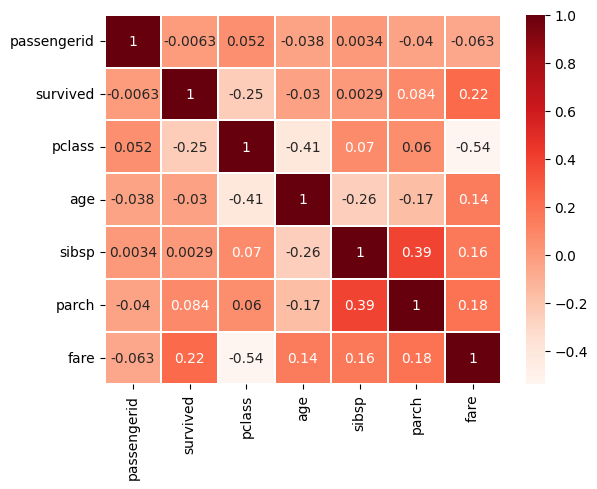

In [52]:
sns.heatmap(train_number.corr(), annot=True, linewidths=0.2, cmap='Reds')

### pclass

### age

### sibsp

### parch

### fare

In [11]:
cols = ["pclass", "age", "sibsp", "parch", "fare"]
tr_num = train[cols]
te_num = test[cols]
tr_num.describe()

,pclass,age,sibsp,parch,fare
count,916.000000,736.000000,916.000000,916.000000,916.000000
mean,2.292576,29.698370,0.507642,0.361354,32.402710
std,0.838675,14.185627,1.044866,0.828054,50.506411
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.458300
75%,3.000000,38.000000,1.000000,0.000000,30.017700
max,3.000000,80.000000,8.000000,9.000000,512.329200


In [ ]:
tr_

## 범주형 데이터 분석

In [54]:
train_object.describe()

,name,gender,ticket,cabin,embarked
count,916,916,916,198,915
unique,915,2,703,146,3
top,"Connolly, Miss. Kate",male,CA. 2343,G6,S
freq,2,589,7,4,645


### gender

In [59]:
# 성별을 0과 1로 치환
train_object["gender"].replace({"male": 1, "female": 0}, inplace=True)
train["gender"].replace({"male": 1, "female": 0}, inplace=True)
test["gender"].replace({"male": 1, "female": 0}, inplace=True)

### name

In [95]:
name_header = re.compile("[a-zA-Z]+\, [ a-zA-Z]+\.")

In [98]:
name_headers = [name_header.search(x).group().strip() for x in train_object["name"]]
name_headers[:5]

['Wheeler, Mr.', 'Henry, Miss.', 'Hays, Mrs.', 'Andersson, Mr.', 'Hold, Mr.']

In [185]:
name_headers_t = [name_header.search(x).group().strip() for x in test["name"]]

In [99]:
name_family = re.compile("[a-zA-Z]+\, ")

In [110]:
name_families = [name_family.search(x).group().strip().replace(",", "") for x in name_headers]
name_families = pd.DataFrame(name_families, columns=["name_family"])
name_families

,name_family
0,Wheeler
1,Henry
2,Hays
3,Andersson
4,Hold
...,...
911,Thomas
912,Cacic
913,Pengelly
914,Mullens


In [190]:
name_families_t = [name_family.search(x).group().strip().replace(",", "") for x in name_headers_t]

In [111]:
name_families.describe()

,name_family
count,916
unique,672
top,Andersson
freq,7


In [103]:
name_title = re.compile(" [ a-zA-Z]+\.")

In [109]:
name_titles = [name_title.search(x).group().strip() for x in name_headers]
name_titles = pd.DataFrame(name_titles, columns=["name_title"])
name_titles

,name_title
0,Mr.
1,Miss.
2,Mrs.
3,Mr.
4,Mr.
...,...
911,Mr.
912,Mr.
913,Mr.
914,Miss.


In [187]:
name_titles_t = [name_title.search(x).group().strip() for x in name_headers_t]

In [121]:
name_titles["name_title"].unique()

array(['Mr.', 'Miss.', 'Mrs.', 'Master.', 'Col.', 'Dr.', 'Rev.', 'Don.',
       'Ms.', 'Major.', 'Jonkheer.', 'Mlle.', 'the Countess.', 'Capt.',
       'Sir.'], dtype=object)

In [133]:
train["name_title"], train["name_family"] = name_titles["name_title"], name_families["name_family"]
train.head()

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,name_title,name_family
0,0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,NaN,0,0,SC/PARIS 2159,12.8750,NaN,S,Mr.,Wheeler
1,1,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q,Miss.,Henry
2,2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S,Mrs.,Hays
3,3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S,Mr.,Andersson
4,4,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,NaN,S,Mr.,Hold


In [192]:
test["name_title"], test["name_family"] = name_titles_t, name_families_t
test.head()

,passengerid,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,name_title,name_family
0,916,3,"McGowan, Miss. Anna ""Annie""",0,15.0,0,0,330923,8.0292,NaN,Q,Miss.,McGowan
1,917,2,"Pinsky, Mrs. (Rosa)",0,32.0,0,0,234604,13.0000,NaN,S,Mrs.,Pinsky
2,918,3,"McCarthy, Miss. Catherine Katie""""",0,NaN,0,0,383123,7.7500,NaN,Q,Miss.,McCarthy
3,919,3,"Franklin, Mr. Charles (Charles Fardon)",1,NaN,0,0,SOTON/O.Q. 3101314,7.2500,NaN,S,Mr.,Franklin
4,920,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",0,45.0,1,1,36928,164.8667,NaN,S,Mrs.,Wick


In [165]:
titles = {
    'Mr.':1,
    'Miss.':2,
    'Mrs.':3,
    'Master.':4,
    'Col.':4,
    'Dr.':4,
    'Rev.':4,
    'Don.':4,
    'Ms.':2,
    'Major.':4,
    'Jonkheer.':4,
    'Mlle.':4,
    'the Countess.':4,
    'Capt.':4,
    'Sir.':3,
}

In [166]:
train["name_title"].replace(titles, inplace=True)
train[:5]

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,name_title,name_family
0,0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,NaN,0,0,SC/PARIS 2159,12.8750,NaN,S,1,Wheeler
1,1,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q,2,Henry
2,2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S,3,Hays
3,3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S,1,Andersson
4,4,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,NaN,S,1,Hold


In [194]:
test["name_title"].replace(titles, inplace=True)
test[:5]

,passengerid,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,name_title,name_family
0,916,3,"McGowan, Miss. Anna ""Annie""",0,15.0,0,0,330923,8.0292,NaN,Q,2,McGowan
1,917,2,"Pinsky, Mrs. (Rosa)",0,32.0,0,0,234604,13.0000,NaN,S,3,Pinsky
2,918,3,"McCarthy, Miss. Catherine Katie""""",0,NaN,0,0,383123,7.7500,NaN,Q,2,McCarthy
3,919,3,"Franklin, Mr. Charles (Charles Fardon)",1,NaN,0,0,SOTON/O.Q. 3101314,7.2500,NaN,S,1,Franklin
4,920,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",0,45.0,1,1,36928,164.8667,NaN,S,3,Wick


In [201]:
train[["survived", "pclass", "gender", "cabin", "embarked", "ticket", "name_family"]].sort_values(["name_family"])

,survived,pclass,gender,cabin,embarked,ticket,name_family
515,1,2,0,NaN,C,P/PP 3381,Abelson
215,0,2,1,NaN,C,P/PP 3381,Abelson
886,1,3,0,NaN,C,2657,Abrahim
431,0,3,1,NaN,S,C 7076,Adahl
151,0,3,1,NaN,S,341826,Adams
...,...,...,...,...,...,...,...
339,1,1,0,C32,C,PC 17760,Young
632,0,3,1,NaN,C,2627,Yousseff
348,0,2,0,NaN,S,248747,Yrois
91,0,3,0,NaN,C,2665,Zabour


### ticket

In [243]:
train_object.drop(["gender"], axis=1).describe()

,name,ticket,cabin,embarked,name_title,name_family
count,916,916,198,915,916,916
unique,915,703,146,3,15,672
top,"Connolly, Miss. Kate",CA. 2343,G6,S,Mr.,Andersson
freq,2,7,4,645,528,7


In [229]:
counts = train["name_family"].value_counts()

In [236]:
counts.loc[counts["name_family"] > 2]

,name_family
Andersson,7
Sage,7
Goodwin,6
Panula,6
Palsson,5
Carter,5
Asplund,5
Smith,5
Skoog,5
Ford,5


In [249]:
train[["survived", "pclass", "gender", "ticket", "cabin", "name_family"]].loc[train["name_family"] == "Newell"]

,survived,pclass,gender,ticket,cabin,name_family
153,0,1,1,35273,D48,Newell
463,1,1,0,35273,D36,Newell
472,1,1,0,35273,D36,Newell


In [221]:
train[["survived", "pclass", "gender", "ticket", "cabin", "name_family"]].loc[train["name_family"] == "Sage"]

,survived,pclass,gender,ticket,cabin,name_family
13,0,3,0,CA. 2343,NaN,Sage
77,1,3,0,CA. 2343,NaN,Sage
330,0,3,1,CA. 2343,NaN,Sage
380,1,3,0,CA. 2343,NaN,Sage
583,0,3,1,CA. 2343,NaN,Sage
752,0,3,1,CA. 2343,NaN,Sage
822,0,3,1,CA. 2343,NaN,Sage


In [237]:
train[["survived", "pclass", "gender", "ticket", "cabin", "name_family"]].loc[train["name_family"] == "Goodwin"]

,survived,pclass,gender,ticket,cabin,name_family
28,1,3,0,CA 2144,NaN,Goodwin
173,0,3,1,CA 2144,NaN,Goodwin
464,0,3,1,CA 2144,NaN,Goodwin
481,0,3,1,CA 2144,NaN,Goodwin
529,0,3,0,CA 2144,NaN,Goodwin
791,0,3,1,CA 2144,NaN,Goodwin


In [238]:
train[["survived", "pclass", "gender", "ticket", "cabin", "name_family"]].loc[train["name_family"] == "Panula"]

,survived,pclass,gender,ticket,cabin,name_family
94,0,3,1,3101295,NaN,Panula
111,0,3,1,3101295,NaN,Panula
241,0,3,1,3101295,NaN,Panula
643,0,3,1,3101295,NaN,Panula
763,0,3,0,3101295,NaN,Panula
848,0,3,1,3101295,NaN,Panula


하다보니 ticket이 같은 사람들에 대한 연관성을 찾을 수가 없다.  
폐기 결정.

In [250]:
train_object.drop(["ticket"], axis=1, inplace=True)
train.drop(["ticket"], axis=1, inplace=True)
test.drop(["ticket"], axis=1, inplace=True)

### cabin

결측치가 너무 많고 그나마 있는것도 생존과 연관하기 어려워 보임.  
폐기 결정.

In [251]:
train_object.drop(["cabin"], axis=1, inplace=True)
train.drop(["cabin"], axis=1, inplace=True)
test.drop(["cabin"], axis=1, inplace=True)

### embarked

In [252]:
train["embarked"].unique()

array(['S', 'Q', 'C', nan], dtype=object)

In [253]:
embarked = {
    'S': 1,
    'Q': 2,
    'C': 3
}

In [270]:
train["embarked_e"] = train["embarked"].replace(embarked)
test["embarked_e"] = test["embarked"].replace(embarked)
train["enbarked_e"]

KeyError: 'enbarked_e'

In [271]:
train.shape, test.shape

((916, 13), (393, 12))

In [175]:
tmp = pd.DataFrame(tmp)

# 결측치 확인

In [8]:
ori_train = pd.read_csv(args.train_csv)
ori_test = pd.read_csv(args.test_csv)

ori_test.isnull().sum()

passengerid      0
pclass           0
name             0
gender           0
age             83
sibsp            0
parch            0
ticket           0
fare             1
cabin          296
embarked         1
dtype: int64

# 결측치 제거

In [283]:
# pclass에 따른 embarked의 통계를 구한다.
pd.pivot_table(pd.concat([train.drop(["survived"], axis=1), test]),
            index=["pclass", "gender"],
            columns=["embarked"],
            values="name",
            aggfunc="count"
)

embarked        C   Q    S
pclass gender             
1      0       71   2   69
       1       70   1  108
2      0       11   2   93
       1       17   5  149
3      0       31  56  129
       1       70  57  366

In [297]:
train_object.loc[train_object["embarked"].isnull()]

,name,gender,embarked,name_title,name_family
387,"Icard, Miss. Amelie",0,NaN,Miss.,Icard


In [300]:
test.loc[test["embarked"].isnull()]

,passengerid,pclass,name,gender,age,sibsp,parch,fare,embarked,name_title,name_family,embarked_e
178,1094,1,"Stone, Mrs. George Nelson (Martha Evelyn)",0,62.0,0,0,80.0,NaN,3,Stone,NaN


In [313]:
# embarked - 결측치 하나 집어서 자르는거 해보기

('passengerid', 0        0
1        1
2        2
3        3
4        4
      ... 
911    911
912    912
913    913
914    914
915    915
Name: passengerid, Length: 916, dtype: int64)
('survived', 0      0
1      0
2      1
3      1
4      0
      ..
911    0
912    0
913    0
914    1
915    1
Name: survived, Length: 916, dtype: int64)
('pclass', 0      2
1      3
2      1
3      3
4      2
      ..
911    3
912    3
913    2
914    3
915    1
Name: pclass, Length: 916, dtype: int64)
('name', 0                         Wheeler, Mr. Edwin Frederick""
1                                     Henry, Miss. Delia
2      Hays, Mrs. Charles Melville (Clara Jennings Gr...
3           Andersson, Mr. August Edvard ("Wennerstrom")
4                                      Hold, Mr. Stephen
                             ...                        
911                                Thomas, Mr. Charles P
912                                 Cacic, Mr. Jego Grga
913                      Pengelly, Mr. Frederi

In [304]:
train.loc[387]

passengerid                    387
survived                         1
pclass                           1
name           Icard, Miss. Amelie
gender                           0
age                           38.0
sibsp                            0
parch                            0
fare                          80.0
embarked                       NaN
name_title                       2
name_family                  Icard
embarked_e                     NaN
Name: 387, dtype: object

In [9]:
age_mean = ori_train['age'].mean()
fare_mean = ori_train['fare'].mean()
cabin_mode = ori_train['cabin'].mode().values[0]
embarked_mode = ori_train['embarked'].mode().values[0]

age_mean, fare_mean, cabin_mode, embarked_mode

(29.69836956521739, 32.40271048034934, 'B57 B59 B63 B66', 'S')

In [10]:
ori_train['cabin'].loc[ori_train['cabin'] == "G6"]
# describe()
# loc[ori_train['cabin'] == "B57 B59 B63 B66"]

113    G6
549    G6
731    G6
815    G6
Name: cabin, dtype: object

In [11]:
ori_train['age'].fillna(age_mean, inplace=True)
ori_train['fare'].fillna(fare_mean, inplace=True)
ori_train['cabin'].fillna(cabin_mode, inplace=True)
ori_train['embarked'].fillna(embarked_mode, inplace=True)
ori_test['age'].fillna(age_mean, inplace=True)
ori_test['fare'].fillna(fare_mean, inplace=True)
ori_test['cabin'].fillna(cabin_mode, inplace=True)
ori_test['embarked'].fillna(embarked_mode, inplace=True)

ori_train.isnull().sum().sum(), ori_test.isnull().sum().sum()

(0, 0)

In [12]:
pd.DataFrame(["male", "female", "male", "male"]).replace({"male": 1, "female": 0})  

,0
0,1
1,0
2,1
3,1


In [13]:
ori_train['gender'].replace({"male": 1, "female": 0}, inplace=True)
ori_test['gender'].replace({"male": 1, "female": 0}, inplace=True)

In [14]:
ori_train["embarked"].replace({"S":0, "Q":1, "C":2}, inplace=True)
ori_test["embarked"].replace({"S":0, "Q":1, "C":2}, inplace=True)

In [16]:
alb = re.compile("[^0-9]")
tmp = "B57 B59 B63 B66"
# for x in alb.findall(tmp):
#     tmp = tmp.replace(x, "")
# tmp
alb.sub("", tmp)

'57596366'

In [17]:
len(alb.findall("123"))

0

In [18]:
ori_train["cabin_sub"] = list(map(lambda x: alb.sub("", x), ori_train["cabin"]))
ori_test["cabin_sub"] = list(map(lambda x: alb.sub("", x), ori_test["cabin"]))
ori_train.loc[ori_train["cabin_sub"] == "", "cabin_sub"] = 0
ori_test.loc[ori_test["cabin_sub"] == "", "cabin_sub"] = 0

In [19]:
ori_train["ticket_sub"] = list(map(lambda x: alb.sub("", x), ori_train["ticket"]))

In [20]:
ori_test["ticket_sub"] = list(map(lambda x: alb.sub("", x), ori_test["ticket"]))

In [21]:
ori_train.loc[ori_train["ticket_sub"] == ""]

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,cabin_sub,ticket_sub
51,51,0,3,"Johnson, Mr. William Cahoone Jr",1,19.0,0,0,LINE,0.0,B57 B59 B63 B66,0,57596366,
158,158,0,3,"Johnson, Mr. Alfred",1,49.0,0,0,LINE,0.0,B57 B59 B63 B66,0,57596366,
187,187,1,3,"Tornquist, Mr. William Henry",1,25.0,0,0,LINE,0.0,B57 B59 B63 B66,0,57596366,
500,500,0,3,"Leonard, Mr. Lionel",1,36.0,0,0,LINE,0.0,B57 B59 B63 B66,0,57596366,


In [22]:
ori_train.loc[ori_train["ticket_sub"] == "", "ticket_sub"] = 0

In [23]:
ori_test.loc[ori_test["ticket_sub"] == "", "ticket_sub"] = 0

In [24]:
ori_train.loc[ori_train["passengerid"] == 158]

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,cabin_sub,ticket_sub
158,158,0,3,"Johnson, Mr. Alfred",1,49.0,0,0,LINE,0.0,B57 B59 B63 B66,0,57596366,0


In [25]:
ori_train["ticket"].nunique()

703

In [26]:
cols = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'gender', 'cabin_sub', 'embarked', "ticket_sub"]
X = ori_train[cols]
y = ori_train['survived']
test = ori_test[cols + ['passengerid']]

X.shape, y.shape, test.shape

((916, 9), (916,), (393, 10))

In [28]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, stratify=ori_train["survived"], random_state=args.random_state)

In [29]:
X_tr.isnull().sum().sum(), X_te.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0, 0)

In [30]:
X_tr.shape, X_te.shape, test.shape

((732, 9), (184, 9), (393, 10))

In [31]:
test.set_index(['passengerid'], inplace=True)

test.head()

,pclass,age,sibsp,parch,fare,gender,cabin_sub,embarked,ticket_sub
passengerid,,,,,,,,,
916,3,15.00000,0,0,8.0292,0,57596366,1,330923
917,2,32.00000,0,0,13.0000,0,57596366,0,234604
918,3,29.69837,0,0,7.7500,0,57596366,1,383123
919,3,29.69837,0,0,7.2500,1,57596366,0,3101314
920,1,45.00000,1,1,164.8667,0,57596366,0,36928


# Model V0

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
modelV0 = DecisionTreeClassifier(random_state=args.random_state)

In [34]:
modelV0.fit(X_tr, y_tr)

DecisionTreeClassifier(random_state=21)

In [35]:
from sklearn.metrics import roc_curve, auc

In [36]:
pred = modelV0.predict_proba(X_te)[:,1]
fpr, tpr, _ = roc_curve(y_te, pred)

In [37]:
auc(fpr, tpr)

0.762781954887218

In [38]:
modelV0.score(X_te, y_te)

0.7771739130434783

In [39]:
test_pred = modelV0.predict_proba(test)[:,1]
test_pred.shape

(393,)

In [38]:
submission["survived"] = test_pred
submission

,passengerid,survived
0,916,1.0
1,917,1.0
2,918,1.0
3,919,0.0
4,920,1.0
...,...,...
388,1304,1.0
389,1305,1.0
390,1306,1.0
391,1307,0.0


In [39]:
submission.set_index("passengerid")
submission

,passengerid,survived
0,916,1.0
1,917,1.0
2,918,1.0
3,919,0.0
4,920,1.0
...,...,...
388,1304,1.0
389,1305,1.0
390,1306,1.0
391,1307,0.0


In [78]:
scores.append({
    "date": datetime.datetime.now().strftime("%Y/%m/%d %H:%M:%S"),
    "model": type(modelV0),
    "score": modelV0.score(X_te, y_te),
    "auc_score": auc(roc_curve(y_te, modelV0.predict_proba(X_te)[:,1])[0], roc_curve(y_te, modelV0.predict_proba(X_te)[:,1])[1]),
})

In [80]:
scores

[{'date': '2023/02/21 14:28:33',
  'model': sklearn.tree._classes.DecisionTreeClassifier,
  'score': 0.7771739130434783,
  'auc_score': 0.762781954887218}]

In [264]:
# submission.to_csv("../data/encore21titanic/submission_0220_2.csv", index=False, header=True)

# Model V1

> 모델을 바꿔볼까

In [81]:
from sklearn.linear_model import LogisticRegression

In [87]:
modelV1_L = LogisticRegression(C=100)

In [88]:
modelV1_L.fit(X_tr, y_tr)

LogisticRegression(C=100)

In [89]:
scores.append({
    "date": datetime.datetime.now().strftime("%Y/%m/%d %H:%M:%S"),
    "model": type(modelV1_L),
    "score": modelV1_L.score(X_te, y_te),
    "auc_score": auc(roc_curve(y_te, modelV1_L.predict_proba(X_te)[:,1])[0], roc_curve(y_te, modelV1_L.predict_proba(X_te)[:,1])[1]),
})
scores

[{'date': '2023/02/21 14:28:33',
  'model': sklearn.tree._classes.DecisionTreeClassifier,
  'score': 0.7771739130434783,
  'auc_score': 0.762781954887218},
 {'date': '2023/02/21 14:34:16',
  'model': sklearn.linear_model._logistic.LogisticRegression,
  'score': 0.6195652173913043,
  'auc_score': 0.6088972431077695},
 {'date': '2023/02/21 14:35:11',
  'model': sklearn.linear_model._logistic.LogisticRegression,
  'score': 0.6195652173913043,
  'auc_score': 0.6088972431077695}]

In [90]:
from sklearn.linear_model import ElasticNet

In [91]:
modelV1_E = ElasticNet(alpha=0.001, l1_ratio=0.8, random_state=args.random_state)
modelV1_E.fit(X_tr, y_tr)

ElasticNet(alpha=0.001, l1_ratio=0.8, random_state=21)

In [93]:
scores.append({
    "date": datetime.datetime.now().strftime("%Y/%m/%d %H:%M:%S"),
    "model": type(modelV1_E),
    "score": modelV1_E.score(X_te, y_te),
    "auc_score": "ElasticNet has no proba",
})
scores

[{'date': '2023/02/21 14:28:33',
  'model': sklearn.tree._classes.DecisionTreeClassifier,
  'score': 0.7771739130434783,
  'auc_score': 0.762781954887218},
 {'date': '2023/02/21 14:34:16',
  'model': sklearn.linear_model._logistic.LogisticRegression,
  'score': 0.6195652173913043,
  'auc_score': 0.6088972431077695},
 {'date': '2023/02/21 14:35:11',
  'model': sklearn.linear_model._logistic.LogisticRegression,
  'score': 0.6195652173913043,
  'auc_score': 0.6088972431077695},
 {'date': '2023/02/21 14:40:17',
  'model': sklearn.linear_model._coordinate_descent.ElasticNet,
  'score': 0.5103822914976845,
  'auc_score': 'ElasticNet has no proba'}]